# Covid-19 (Coronavirus) 
## Tracker for Locations with Friends & Family

Note - All data was gathered and prepared on the [Covid19_Data_ETL.ipynb](https://github.com/BrianLeip/CoronaVirus/blob/master/Covid19_Data_ETL.ipynb) notebook prior to loading into this notebook, following standard best practices for data analytics.

## Data Sources

### Primary Data Source: Johns Hopkins CSSE Data Repository 
- Link: https://github.com/CSSEGISandData/COVID-19  
- **Live data:**
    - Countries (cases, deaths, recoveries, active)
    - US States (cases, deaths)
    - US County (cases, deaths)
- **Historic time series data:**
    - Countries (cases, deaths, recoveries, active)
    - US States (cases, deaths)
    - US Counties (cases, deaths)

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
import os
import seaborn as sns

In [2]:
sns.set()
sns.set_style("whitegrid")
sns.set_palette("Paired")

## Load the Data
See the Covid19_Data_ETL notebook for info on the data gathering and wrangling process.  
All original data left unchanged, only the format was changed to make it preferable to work with for EDA and Data Viz

### Dataset 1: John Hopkins

In [3]:
jh_live_global = pd.read_csv('Datasets/JH/orig/jh_live_global_orig.csv')
jh_live_countries = pd.read_csv('Datasets/JH/jh_live_countries.csv', index_col=0)
jh_live_usstates = pd.read_csv('Datasets/JH/jh_live_usstates.csv', index_col=0)
jh_live_uscounties = pd.read_csv('Datasets/JH/jh_live_uscounties.csv', index_col=[0,1])
jh_hist_countries_cases = pd.read_csv('Datasets/JH/jh_hist_countries_cases.csv', index_col=0, parse_dates=True)
jh_hist_countries_deaths = pd.read_csv('Datasets/JH/jh_hist_countries_deaths.csv', index_col=0, parse_dates=True)
jh_hist_countries_recovered = pd.read_csv('Datasets/JH/jh_hist_countries_recovered.csv', index_col=0, parse_dates=True)
jh_hist_usstates_cases = pd.read_csv('Datasets/JH/jh_hist_usstates_cases.csv', index_col=0, parse_dates=True)
jh_hist_usstates_deaths = pd.read_csv('Datasets/JH/jh_hist_usstates_deaths.csv', index_col=0, parse_dates=True)
jh_hist_uscounties_cases = pd.read_csv('Datasets/JH/jh_hist_uscounties_cases.csv', index_col=0, header=[0,1], parse_dates=True)
jh_hist_uscounties_deaths = pd.read_csv('Datasets/JH/jh_hist_uscounties_deaths.csv', index_col=0, header=[0,1], parse_dates=True)

## Prep Some Commonly Used Data (e.g. current date for each dataset)

In [4]:
jh_live_date = jh_live_global['Last_Update'][7] # The 0th item is not updated (Diamond princess) so grab one that is updated instead.
jh_live_date = pd.to_datetime(jh_live_date)
jh_live_date = pd.Timestamp(jh_live_date.year, jh_live_date.month, jh_live_date.day)
jh_live_date

Timestamp('2022-03-01 00:00:00')

In [5]:
jh_hist_date = jh_hist_countries_cases.index[-1]
jh_hist_date

Timestamp('2022-02-28 00:00:00')

In [6]:
# Date to zoom in on for charting recent data
zoom_date1 = '3/15/2020'
zoom_date2 = '4/1/2020'
zoom_date3 = '4/15/2020'
zoom_date4 = '5/1/2020'
zoom_date5 = '5/15/2020'
zoom_date6 = '6/1/2020'
zoom_date7 = '6/15/2020'
zoom_date8 = '7/1/2020'

## Exploratory Data Analysis (EDA)

### Global and Country Level

In [7]:
# Total Global confirmed cases, deaths, recovered, and active (live)
pd.DataFrame(jh_live_countries[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum() )

,0
Confirmed,436983302.0
Deaths,5956509.0
Recovered,0.0
Active,431026793.0


In [8]:
# Top countries by confirmed count as of latest date
top_countries = jh_live_countries.nlargest(12, 'Confirmed')
top_countries.head()

,Confirmed,Deaths,Recovered,Active,Last_Update,Lat,Long
Country_Region,,,,,,,
US,79045043,950490,0.0,78094553.0,2022-03-01 04:21:09,37.934269,-91.444083
India,42931045,514023,0.0,42417022.0,2022-03-01 04:21:09,23.088275,81.806127
Brazil,28796571,649676,0.0,28146895.0,2022-03-01 04:21:09,-12.669522,-48.480493
France,22877926,139382,0.0,22738544.0,2022-03-01 04:21:09,6.430808,-34.730285
United Kingdom,19021076,161934,0.0,18859142.0,2022-03-01 04:21:09,30.654806,-30.248397


<AxesSubplot:title={'center':'Top Countries - Confirmed Cases Over Time'}>

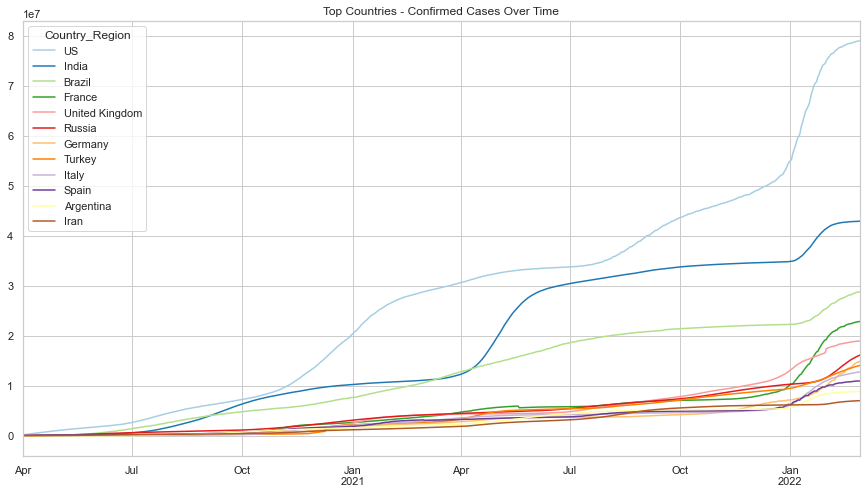

In [9]:
# Plot the top countries confirmed infections over time
jh_hist_countries_cases.loc[zoom_date2:, top_countries.index].plot(figsize=(15,8), title="Top Countries - Confirmed Cases Over Time")

### US State Level

In [10]:
# Top US States by confirmed cases
top_states = jh_live_usstates.nlargest(12, 'Confirmed')
top_states

,Confirmed,Deaths,Recovered,Active,Last_Update,Lat,Long
Province_State,,,,,,,
California,8978479,85468,0.0,8893011.0,2022-03-01 04:21:09,37.843962,-120.728594
Texas,6617106,84899,0.0,6532207.0,2022-03-01 04:21:09,31.660643,-98.653069
Florida,5844096,70084,0.0,5774012.0,2022-03-01 04:21:09,28.940755,-82.700744
New York,4925221,67358,0.0,4857863.0,2022-03-01 04:21:09,42.544151,-75.474183
Illinois,3031220,35196,0.0,2996024.0,2022-03-01 04:21:09,39.843618,-89.178330
Pennsylvania,2757425,43216,0.0,2714209.0,2022-03-01 04:21:09,40.818078,-77.615318
Ohio,2653940,36580,0.0,2617360.0,2022-03-01 04:21:09,40.310670,-82.835408
North Carolina,2589517,22570,0.0,2566947.0,2022-03-01 04:21:09,35.624210,-79.501099
Georgia,2465056,35415,0.0,2429641.0,2022-03-01 04:21:09,32.808532,-83.577430


<AxesSubplot:title={'center':'Confirmed Cases - Top US States'}>

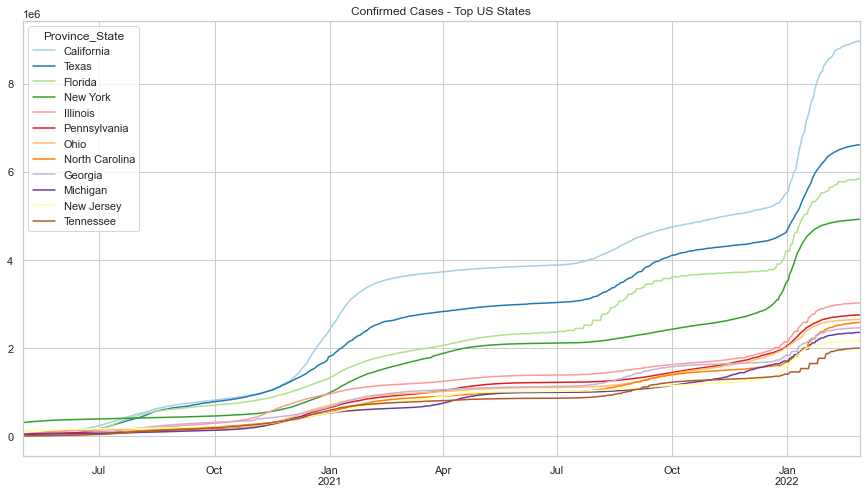

In [11]:
# Chart the top states with confirmed positive
jh_hist_usstates_cases.loc[zoom_date4:, top_states.index].plot(title='Confirmed Cases - Top US States', figsize=(15,8))

<AxesSubplot:title={'center':'Deaths - Top US States'}>

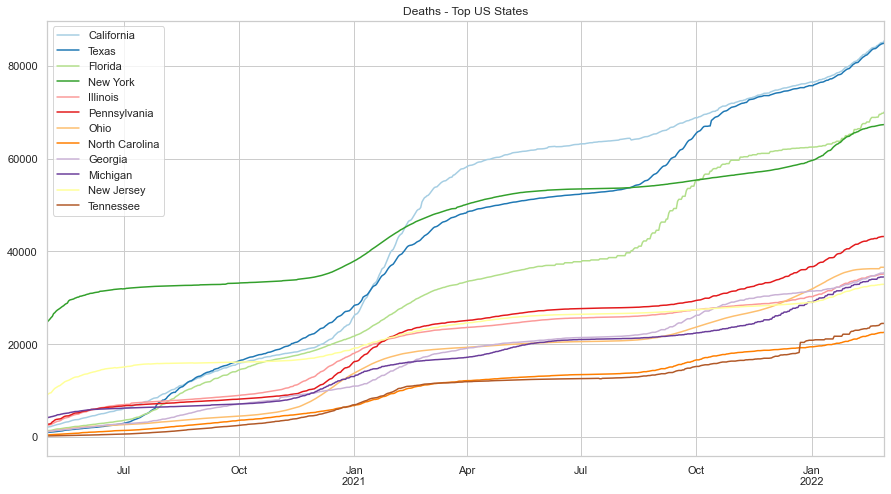

In [12]:
# Chart the top states of by # of deaths
jh_hist_usstates_deaths[top_states.index].loc[zoom_date4:, :].plot(title='Deaths - Top US States', figsize=(15,8))

### US County Level

In [13]:
top_counties_MA = jh_live_uscounties.loc['Massachusetts'].nlargest(12, 'Confirmed')
top_counties_MA.head()

,Confirmed,Deaths,Recovered,Active,Last_Update,Lat,Long,FIPS
Admin2,,,,,,,,
Middlesex,316954,4662,0.0,312292.0,2022-03-01 04:21:09,42.486077,-71.390492,25017.0
Suffolk,206279,2286,0.0,203993.0,2022-03-01 04:21:09,42.327951,-71.078504,25025.0
Essex,202395,3122,0.0,199273.0,2022-03-01 04:21:09,42.668763,-70.946872,25009.0
Worcester,189156,2989,0.0,186167.0,2022-03-01 04:21:09,42.350270,-71.904934,25027.0
Bristol,148109,2451,0.0,145658.0,2022-03-01 04:21:09,41.792284,-71.108722,25005.0


<AxesSubplot:title={'center':'Confirmed Cases - Top MA Counties'}>

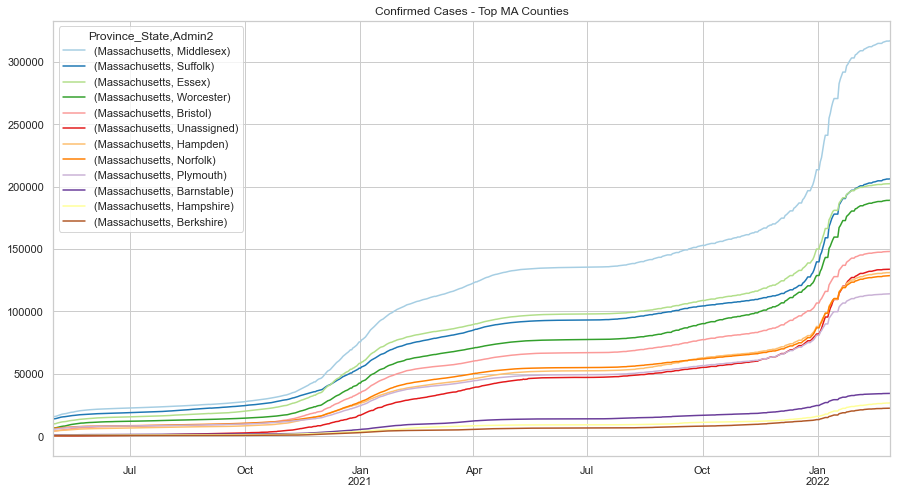

In [14]:
# Chart the MA Counties confirmed cases over time
top_counties_MA_filter = jh_hist_uscounties_cases.loc[jh_hist_date, ('Massachusetts')].nlargest(12).index
top_counties_MA_cases = jh_hist_uscounties_cases.loc[zoom_date4:, ('Massachusetts', top_counties_MA_filter)].sort_values(axis=1, by=jh_hist_date, ascending=False)
top_counties_MA_cases.plot(title='Confirmed Cases - Top MA Counties', figsize=(15,8))

<AxesSubplot:title={'center':'Deaths - Top MA Counties'}>

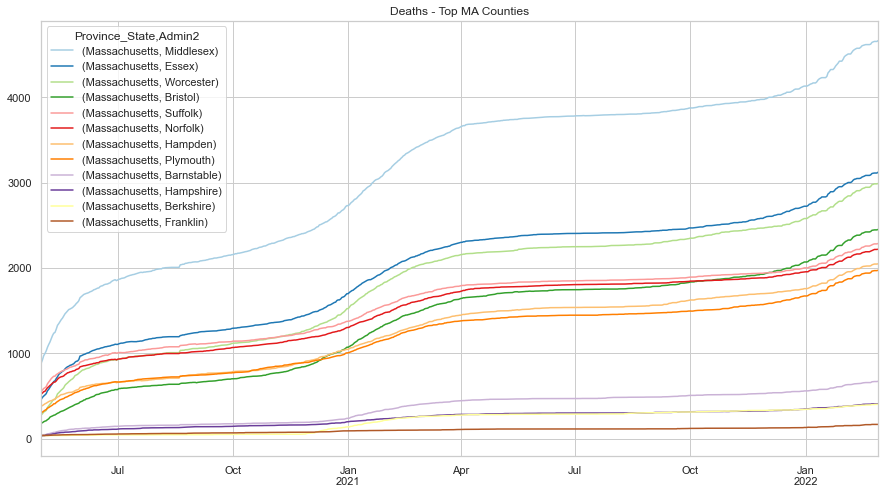

In [15]:
# Chart the MA County deaths over time
top_counties_MA_filter = jh_hist_uscounties_deaths.loc[jh_hist_date, ('Massachusetts')].nlargest(12).index
top_counties_MA_deaths = jh_hist_uscounties_deaths.loc[zoom_date4:, ('Massachusetts', top_counties_MA_filter)].sort_values(axis=1, by=jh_hist_date, ascending=False)
top_counties_MA_deaths.plot(title='Deaths - Top MA Counties', figsize=(15,8))

In [16]:
top_counties_CA = jh_live_uscounties.loc['California'].nlargest(12, 'Confirmed')
top_counties_CA.head(5)

,Confirmed,Deaths,Recovered,Active,Last_Update,Lat,Long,FIPS
Admin2,,,,,,,,
Los Angeles,2796560,30716,0.0,2765844.0,2022-03-01 04:21:09,34.308284,-118.228241,6037.0
San Diego,786060,5018,0.0,781042.0,2022-03-01 04:21:09,33.034846,-116.736533,6073.0
Riverside,613472,6179,0.0,607293.0,2022-03-01 04:21:09,33.743150,-115.993358,6065.0
Orange,581172,6609,0.0,574563.0,2022-03-01 04:21:09,33.701475,-117.764600,6059.0
San Bernardino,580178,6572,0.0,573606.0,2022-03-01 04:21:09,34.840603,-116.177469,6071.0


<AxesSubplot:title={'center':'Confirmed Cases - Top CA Counties'}>

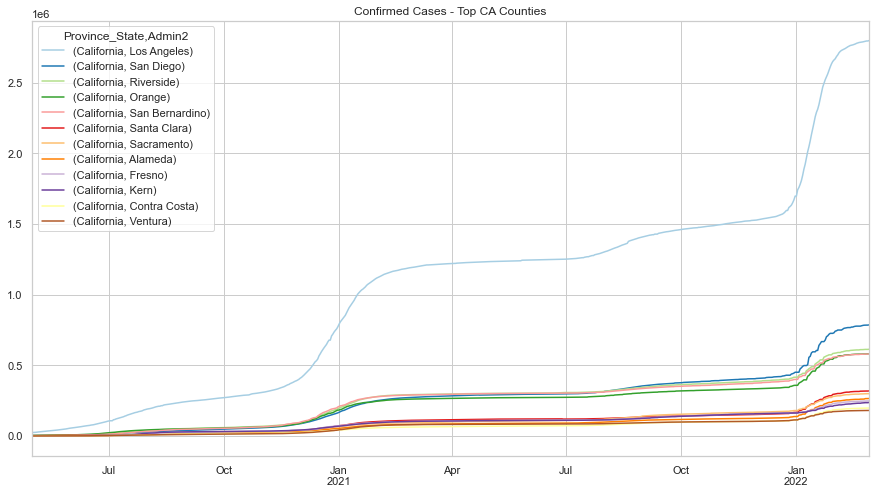

In [17]:
# Chart the CA Counties confirmed cases over time
top_counties_CA_filter = jh_hist_uscounties_cases.loc[jh_hist_date, ('California')].nlargest(12).index
top_counties_CA_cases = jh_hist_uscounties_cases.loc[zoom_date4:, ('California', top_counties_CA_filter)].sort_values(axis=1, by=jh_hist_date, ascending=False)
top_counties_CA_cases.plot(title='Confirmed Cases - Top CA Counties', figsize=(15,8))

<AxesSubplot:title={'center':'Confirmed Cases - Top CA Counties (excl Los Angeles)'}>

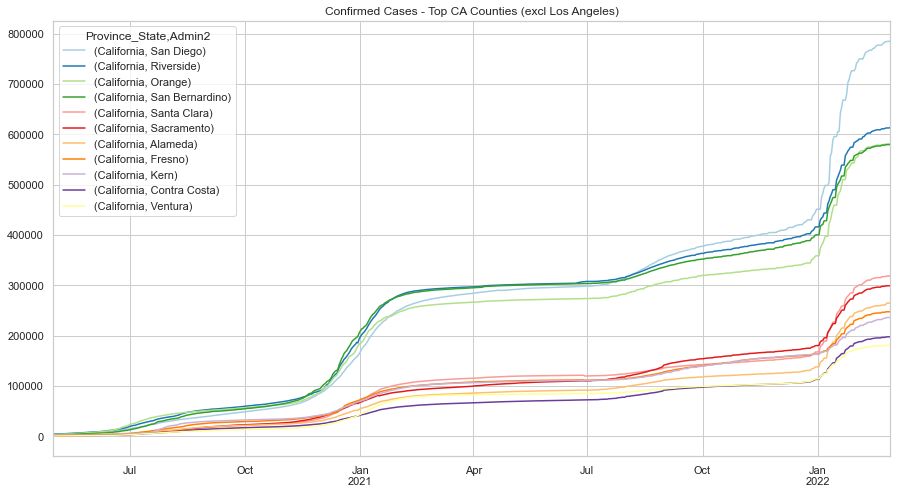

In [18]:
# Same chart but excluding Los Angeles to zoom in on the others
top_counties_CAexLA_cases = top_counties_CA_cases.loc[:, ('California', top_counties_CA_filter != 'Los Angeles')]
top_counties_CAexLA_cases.plot(title='Confirmed Cases - Top CA Counties (excl Los Angeles)', figsize=(15,8))

<AxesSubplot:title={'center':'Deaths - Top CA Counties'}>

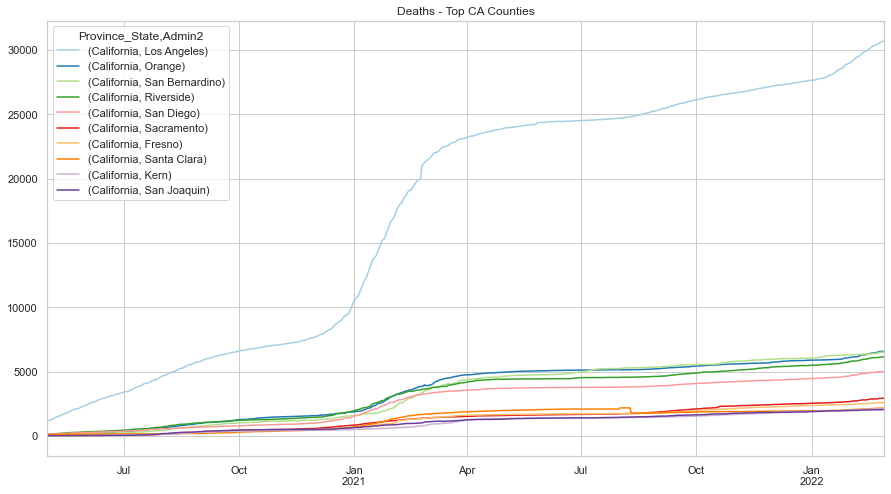

In [19]:
# Chart the CA Counties deaths over time
top_counties_CA_filter = jh_hist_uscounties_deaths.loc[jh_hist_date, ('California')].nlargest(10).index
top_counties_CA_deaths = jh_hist_uscounties_deaths.loc[zoom_date4:, ('California', top_counties_CA_filter)].sort_values(axis=1, by=jh_hist_date, ascending=False)
top_counties_CA_deaths.plot(title='Deaths - Top CA Counties', figsize=(15,8))

<AxesSubplot:title={'center':'Deaths - Top CA Counties (excl Los Angeles)'}>

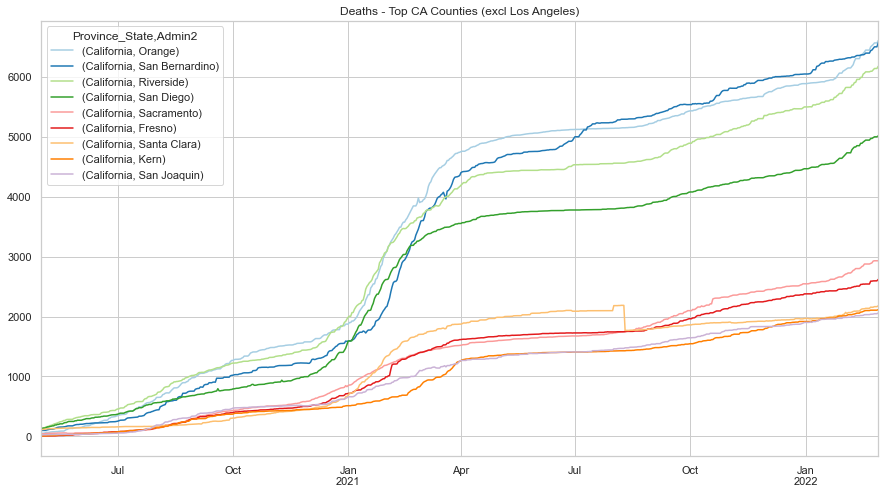

In [20]:
# Same chart but excluding Los Angeles to zoom in on the others
top_counties_CAexLA_deaths = top_counties_CA_deaths.loc[:, ('California', top_counties_CA_filter != 'Los Angeles')]
top_counties_CAexLA_deaths.plot(title='Deaths - Top CA Counties (excl Los Angeles)', figsize=(15,8))

### US Counties - Friends & Family

In [21]:
fnf_counties = [('California', 'Orange'), ('Massachusetts', 'Middlesex'), ('Massachusetts', 'Suffolk'), 
                ('Massachusetts', 'Essex'), ('Massachusetts', 'Bristol')]

#### Live stats for locations where friends and family live

In [22]:
# Add live stats from US Counties of friends & family
fnf_live = jh_live_uscounties.loc[fnf_counties, :]
fnf_live = fnf_live.drop('FIPS', axis=1)

In [23]:
# Add live stats from Costa Rica from the Countries dataset
fnf_cr = jh_live_countries.loc[['Costa Rica']]

In [24]:
# Merge Costa Rica data with US County data
fnf_live.loc[('Costa Rica')] = fnf_cr.loc[('Costa Rica')]

In [25]:
# Display all live data
fnf_live

,Confirmed,Deaths,Recovered,Active,Last_Update,Lat,Long
"(California, Orange)",581172,6609,0.0,574563.0,2022-03-01 04:21:09,33.701475,-117.764600
"(Massachusetts, Middlesex)",316954,4662,0.0,312292.0,2022-03-01 04:21:09,42.486077,-71.390492
"(Massachusetts, Suffolk)",206279,2286,0.0,203993.0,2022-03-01 04:21:09,42.327951,-71.078504
"(Massachusetts, Essex)",202395,3122,0.0,199273.0,2022-03-01 04:21:09,42.668763,-70.946872
"(Massachusetts, Bristol)",148109,2451,0.0,145658.0,2022-03-01 04:21:09,41.792284,-71.108722
Costa Rica,806928,8037,0.0,798891.0,2022-03-01 04:21:09,9.748900,-83.753400


#### Confirmed cases over time in locations where friends and family live

In [26]:
# Add confirmed cases from US Counties of friends & family
fnf_hist_cases = jh_hist_uscounties_cases.loc[:, fnf_counties ]

In [27]:
# Add confirmed cases in Costa Rica from the Countries dataset
fnf_hist_cases[('Costa Rica', '')] = jh_hist_countries_cases['Costa Rica']

In [28]:
# Check the most recent 8 days (week + start)
fnf_hist_cases.tail(8)

Province_State California Massachusetts                         Costa Rica
Admin2             Orange     Middlesex Suffolk   Essex Bristol           
2022-02-21         578444        314707  204632  201680  147426     790444
2022-02-22         579493        315587  205374  202013  147755     793835
2022-02-23         579815        315897  205539  202060  147830     797030
2022-02-24         580144        316238  205759  202179  147922     799826
2022-02-25         580505        316558  206068  202263  147995     802472
2022-02-26         580505        316558  206068  202263  147995     802472
2022-02-27         580505        316558  206068  202263  147995     802472
2022-02-28         581172        316954  206279  202395  148109     806928

In [29]:
# Sort in descending order
fnf_hist_cases.sort_values(jh_hist_date, axis=1, ascending=False, inplace=True)

<AxesSubplot:title={'center':'Confirmed Cases - Counties of Friends & Family'}>

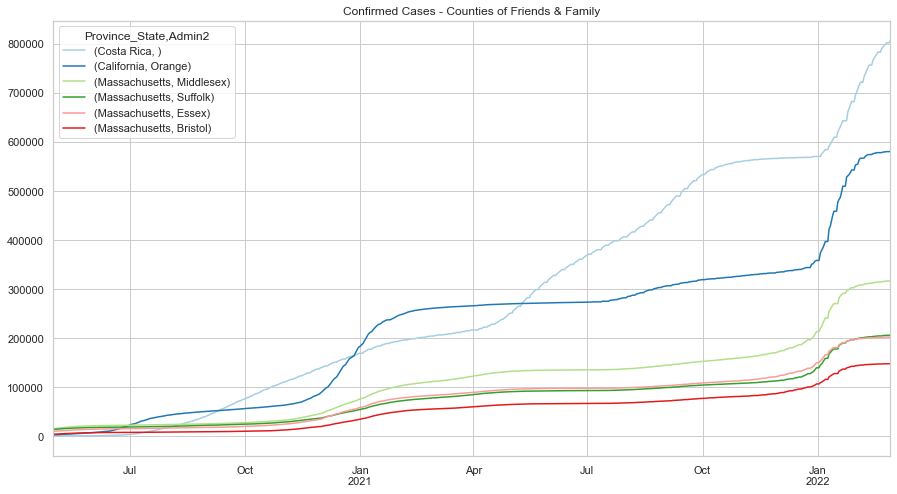

In [30]:
# Plot the data in a chart
fnf_hist_cases.loc[zoom_date4:,:].plot(title='Confirmed Cases - Counties of Friends & Family', figsize=(15,8))

#### Deaths over time in locations where friends and family live

In [31]:
# Add deaths from US Counties of friends & family
fnf_hist_deaths = jh_hist_uscounties_deaths.loc[:, fnf_counties ]

In [32]:
# Add MA "Unassigned" since there are days where deaths are flat on the County level while they are unassigned
fnf_hist_deaths[('Massachusetts', 'Unassigned')] = jh_hist_uscounties_deaths.loc[:, ('Massachusetts', 'Unassigned') ]

In [33]:
# Add deaths in Costa Rica from the Countries dataset
fnf_hist_deaths[('Costa Rica', '')] = jh_hist_countries_deaths['Costa Rica']

In [34]:
# Check the most recent 8 days (week + start)
fnf_hist_deaths.tail(8)

Province_State California Massachusetts                                   \
Admin2             Orange     Middlesex Suffolk Essex Bristol Unassigned   
2022-02-21           6450          4615    2256  3083    2421          9   
2022-02-22           6505          4620    2262  3089    2426          9   
2022-02-23           6524          4640    2270  3105    2440          9   
2022-02-24           6544          4647    2277  3109    2443          9   
2022-02-25           6570          4652    2281  3111    2445          9   
2022-02-26           6570          4652    2281  3111    2445          9   
2022-02-27           6570          4652    2281  3111    2445          9   
2022-02-28           6609          4662    2286  3122    2451          9   

Province_State Costa Rica  
Admin2                     
2022-02-21           7936  
2022-02-22           7954  
2022-02-23           7969  
2022-02-24           7984  
2022-02-25           7999  
2022-02-26           7999  
2022-02-27           7999  
2022-02-28           8037

In [35]:
# Sort in descending order
fnf_hist_deaths.sort_values(jh_hist_date, axis=1, ascending=False, inplace=True)

<AxesSubplot:title={'center':'Deaths - Counties of Friends & Family'}>

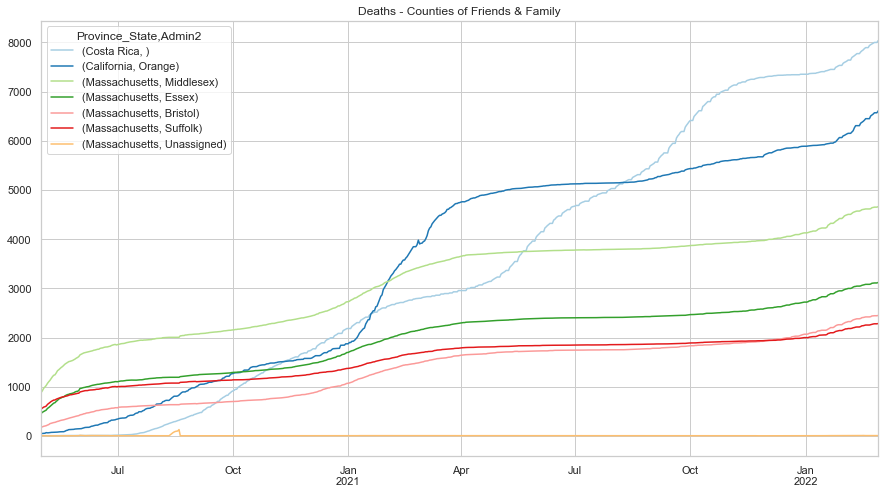

In [36]:
# Plot the data in a chart
fnf_hist_deaths.loc[zoom_date4:,:].plot(title='Deaths - Counties of Friends & Family', figsize=(15,8))